# Bike Sharing

- Nama : Ponco Nugrah Wibowo
- Email : noeke7236@gmail.com
- Id Dicoding : noeke7236

#### Menentukan Pertanyaan Bisnis :
1. Berapa nilai maksimum, minimum, mean, median dan standar deviasi untuk suhu (temperature), kelembaban (humidity), kecepatan angin (windspeed) dan jumlah sepeda yang disewa (count) berdasarkan musim?
2. Berapa nilai maksimum, minimum, mean, median dan standar deviasi untuk suhu (temperature), kelembaban (humidity), kecepatan angin (windspeed) dan jumlah sepeda yang disewa (count) berdasarkan bulan?
3. Bagaimana perubahan suhu (temperature), kelembaban (humidity) dan kecepatan angin (windspeed) di sepanjang musim?
4. Berapa nilai rata-rata suhu (temperature), kelembaban (humidity), kecepatan angin (windspeed) dan jumlah sepeda yang disewa (count) berdasarkan bulan?
5. Apakah suhu (temperature), kelembaban (humidity) dan kecepatan angin (windspeed) berkaitan erat dengan pengguna (user casual dan user registered)?
6. Apakah kondisi cuaca berpengaruh dengan jumlah sepeda yang disewa?
7. Bagaimana statistik jumlah sepeda yang disewa berdasarkan tahun (2011 dan 2012) dan bulan?
8. Bagaimana trend penyewaan sepeda berdasarkan hari dalam 1 pekan?
9. Bagaimana trend penyewaan sepeda berdasarkan hari kerja dan hari libur di tahun 2011?
10. Bagaimana trend penyewaan sepeda berdasarkan hari kerja dan hari libur di tahun 2012?

#### Menyiapkan semua library yang dibutuhkan

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
#Memuat tabel day (hari)
rent_data = pd.read_csv("data_1.csv")

In [3]:
#Menampilkan 5 baris data
rent_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Melihat informasi detail struktur DataFrame
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Assesing Data

In [5]:
#Menyalin DataFrame untuk menghindari modifikasi data asli
rent_data_modified = rent_data.copy()

In [6]:
#Merubah nama kolom
rent_data_modified.rename(columns={'instant':'no','dteday':'date','season': 'season_code','windspeed':'wind_speed','cnt':'count'},inplace=True)

rent_data_modified.head()

,no,date,season_code,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,wind_speed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
#Cek missing value pada tabel
rent_data_modified.isna().sum()

no             0
date           0
season_code    0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
wind_speed     0
casual         0
registered     0
count          0
dtype: int64

In [8]:
#Cek missing value pada tabel
rent_data_modified.isnull().sum()

no             0
date           0
season_code    0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
wind_speed     0
casual         0
registered     0
count          0
dtype: int64

In [9]:
#Cek duplikasi data pada tabel
print("Jumlah duplikasi: ",rent_data_modified.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
#Menampilkan ringkasan parameter statistik
rent_data_modified.describe(include="all")

,no,date,season_code,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,wind_speed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


## Cleaning Data

In [11]:
#Mengganti tipe data pada kolom dteday menjadi datetime di tabel day (hari)
rent_data_modified['date'] = pd.to_datetime(rent_data_modified['date'])

rent_data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   no           731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season_code  731 non-null    int64         
 3   yr           731 non-null    int64         
 4   mnth         731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weathersit   731 non-null    int64         
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  wind_speed   731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count        731 non-null    int64         
dtypes: datet

# Exploratory Data Analysis (EDA)

#### Explore

In [12]:
#Konversi suhu -> temp : Normalized temperature in Celsius. The values are divided to 41 (max)
rent_data_modified['temperature'] = rent_data_modified['temp'] * 41

#Konversi kelembaban -> - hum: Normalized humidity. The values are divided to 100 (max)
rent_data_modified['humidity'] = rent_data_modified['hum'] * 100

#Konversi kecepatan angin ->  - windspeed: Normalized wind speed. The values are divided to 67 (max)
rent_data_modified['windspeed'] = rent_data_modified['wind_speed'] * 67

rent_data_modified.head()

,no,date,season_code,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,wind_speed,casual,registered,count,temperature,humidity,windspeed
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847,80.5833,10.749882
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598,69.6087,16.652113
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924,43.7273,16.636703
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000,59.0435,10.739832
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237,43.6957,12.522300


In [13]:
#Konversi musim -> season : season (1:springer, 2:summer, 3:fall, 4:winter)
map_season = pd.DataFrame({
    "season_code": np.arange(1, 5),
    "season": ["spring", "summer", "fall", "winter"]})

rent_data_modified = pd.merge(rent_data_modified, map_season, on='season_code')
rent_data_modified.head()

,no,date,season_code,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,wind_speed,casual,registered,count,temperature,humidity,windspeed,season
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847,80.5833,10.749882,spring
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598,69.6087,16.652113,spring
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924,43.7273,16.636703,spring
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000,59.0435,10.739832,spring
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237,43.6957,12.522300,spring


In [14]:
#Konversi bulan
map_month = pd.DataFrame({
    "mnth": np.arange(1, 13),
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
})

rent_data_modified = pd.merge(rent_data_modified, map_month, on='mnth')
rent_data_modified.head()

,no,date,season_code,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,wind_speed,casual,registered,count,temperature,humidity,windspeed,season,month
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,14.110847,80.5833,10.749882,spring,Jan
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,14.902598,69.6087,16.652113,spring,Jan
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,8.050924,43.7273,16.636703,spring,Jan
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,8.200000,59.0435,10.739832,spring,Jan
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,9.305237,43.6957,12.522300,spring,Jan


In [15]:
#Konversi cuaca
#+ weathersit : 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#"weather":[1:Good,2:Moderate:3:Bad,4:Worse]
map_weather = pd.DataFrame({
    "weathersit": np.arange(1, 5),
    "weather": ["good", "moderate", "bad", "worse"]})

rent_data_modified = pd.merge(rent_data_modified, map_weather, on='weathersit')
rent_data_modified.head()

,no,date,season_code,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,wind_speed,casual,registered,count,temperature,humidity,windspeed,season,month,weather
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.160446,331,654,985,14.110847,80.5833,10.749882,spring,Jan,moderate
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.248539,131,670,801,14.902598,69.6087,16.652113,spring,Jan,moderate
2,7,2011-01-07,1,0,1,0,5,1,2,0.196522,...,0.168726,148,1362,1510,8.057402,49.8696,11.304642,spring,Jan,moderate
3,8,2011-01-08,1,0,1,0,6,0,2,0.165000,...,0.266804,68,891,959,6.765000,53.5833,17.875868,spring,Jan,moderate
4,11,2011-01-11,1,0,1,0,2,1,2,0.169091,...,0.122132,43,1220,1263,6.932731,68.6364,8.182844,spring,Jan,moderate


### Visualization & Explanatory Analysis

In [16]:
sns.set_theme(style="darkgrid")

#### 1. Berapa nilai maksimum, minimum, mean, median dan standar deviasi untuk suhu (temperature), kelembaban (humidity), kecepatan angin (windspeed) dan jumlah sepeda yang disewa (count) berdasarkan musim?

In [17]:
#Menghitung data suhu, kelembaban, kecepatan angin dan jumlah sepeda yang disewa
rent_data_modified.groupby(['season']).agg({
    "temperature": ["max", "min", "mean", "median", "std"],
    "humidity": ["max", "min", "mean", "median", "std"],
    "windspeed": ["max", "min", "mean", "median", "std"],
    "count": ["max", "min", "mean", "median", "std"]
})

temperature                                            humidity  \
               max        min       mean     median       std      max   
season                                                                   
fall     35.328347  19.235847  28.958682  29.297903  2.904749  93.9565   
spring   23.472500   2.424346  12.207650  11.719153  4.212136  94.8261   
summer   33.141653  10.374763  22.320611  23.045423  5.028649  92.2500   
winter   26.957500   9.054153  17.339148  16.775827  4.421179  97.2500   

                                                windspeed            \
            min       mean   median        std        max       min   
season                                                                
fall    36.0000  63.348206  63.5000  11.934864  25.166339  4.292744   
spring   0.0000  58.290291  54.4167  15.187972  34.000021  3.042356   
summer  25.4167  62.694833  64.4375  15.284075  26.000489  4.417256   
winter  33.3478  66.871917  66.1042  13.124796  28.292425  1.500244   

                                       count                             \
             mean     median       std   max   min         mean  median   
season                                                                    
fall    11.530366  11.062705  3.988275  8714  1115  5644.303191  5353.5   
spring  14.373984  13.584250  5.791401  7836   431  2604.132597  2209.0   
summer  13.634978  13.000077  4.799113  8362   795  4992.331522  4941.5   
winter  11.523637  11.188029  5.464839  8555    22  4728.162921  4634.5   

                     
                std  
season               
fall    1459.800381  
spring  1399.942119  
summer  1695.977235  
winter  1699.615261

#### 2. Berapa nilai maksimum, minimum, mean, median dan standar deviasi untuk suhu (temperature), kelembaban (humidity), kecepatan angin (windspeed) dan jumlah sepeda yang disewa (count) berdasarkan bulan?

In [18]:
#Menghitung data suhu, kelembaban, kecepatan angin dan jumlah sepeda yang disewa
rent_data_modified.groupby(['mnth','month']).agg({
    "temperature": ["max", "min", "mean", "median", "std"],
    "humidity": ["max", "min", "mean", "median", "std"],
    "windspeed": ["max", "min", "mean", "median", "std"],
    "count": ["max", "min", "mean", "median", "std"]
})

temperature                                            humidity  \
                   max        min       mean     median       std      max   
mnth month                                                                   
1    Jan     17.425000   2.424346   9.694201   8.917500  3.413911  91.1250   
2    Feb     21.388347   5.227500  12.268284  11.719153  3.456893  92.9167   
3    Mar     24.668347   8.131653  16.012089  15.594124  4.291649  94.8261   
4    Apr     27.230847  12.300000  19.269952  18.842923  3.577446  88.8333   
5    May     31.775000  16.980847  24.386735  24.429153  2.992979  92.2500   
6    June    34.200847  22.174153  28.047985  28.307077  2.709868  83.3333   
7    July    35.328347  24.429153  30.974287  30.698750  2.129953  86.5417   
8    Aug     32.526653  26.069153  29.051844  29.015536  1.636442  85.0000   
9    Sep     30.886653  19.235847  25.275884  25.471250  2.538568  97.2500   
10   Oct     26.957500  10.420847  19.885500  20.124174  3.444389  90.6250   
11   Nov     21.730000  10.079153  15.138010  14.725847  2.645619  96.2500   
12   Dec     19.509153   8.849153  13.285270  12.846673  2.781923  97.0417   

                                                     windspeed            \
                min       mean    median        std        max       min   
mnth month                                                                 
1    Jan    31.1250  58.582827  53.76630  15.094211  27.833743  4.917519   
2    Feb    18.7917  56.746468  53.79170  14.593142  34.000021  3.042356   
3    Mar     0.0000  58.847503  58.02080  18.584435  29.584721  6.000406   
4    Apr    25.4167  58.806312  56.95835  16.737713  26.000489  4.417256   
5    May    36.0417  68.895831  70.72920  11.839906  22.958689  5.000712   
6    June   30.5000  57.580552  57.79165  11.383728  23.292014  5.167375   
7    July   39.6250  59.787632  59.56250  10.367657  19.082471  5.416950   
8    Aug    41.5000  63.773010  63.91665  10.051036  25.166339  4.708981   
9    Sep    46.7083  71.471437  71.08335  12.767749  23.958329  3.375406   
10   Oct    46.3333  69.376087  70.25000  10.954731  28.292425  1.500244   
11   Nov    33.3478  62.487648  61.70835  12.839484  25.250357  3.125550   
12   Dec    44.1250  66.604052  64.02085  13.618975  27.292182  3.167425   

                                           count                             \
                 mean     median       std   max   min         mean  median   
mnth month                                                                    
1    Jan    13.822285  12.729162  5.363222  4521   431  2176.338710  1939.0   
2    Feb    14.450824  13.110761  6.091763  5062  1005  2655.298246  2402.0   
3    Mar    14.920863  14.770988  5.223455  8362   605  3692.258065  3216.5   
4    Apr    15.710310  15.666978  5.172675  7460   795  4484.900000  4293.5   
5    May    12.260258  11.688016  4.223581  8294  2633  5349.774194  4890.5   
6    June   12.423134  11.521052  4.099270  8120  3767  5772.366667  5308.5   
7    July   11.125941  11.042036  2.930981  8173  3285  5563.677419  5446.5   
8    Aug    11.585516  11.166521  4.311703  7865  1115  5664.419355  5229.5   
9    Sep    11.118323  10.166714  4.444734  8714  1842  5766.516667  5384.0   
10   Oct    11.738767  11.166387  5.805927  8156    22  5199.225806  5013.0   
11   Nov    12.314695  11.812938  5.714376  6852  1495  4247.183333  4081.0   
12   Dec    11.832798  11.110710  5.881062  6606   441  3403.806452  3444.0   

                         
                    std  
mnth month               
1    Jan    1161.674370  
2    Feb    1145.313307  
3    Mar    1899.301812  
4    Apr    1776.160778  
5    May    1298.711561  
6    June   1240.400031  
7    July   1273.751871  
8    Aug    1494.516146  
9    Sep    1810.130649  
10   Oct    1988.392517  
11   Nov    1285.712709  
12   Dec    1549.639353

#### 3. Bagaimana perubahan suhu (temperature), kelembaban (humidity) dan kecepatan angin (windspeed) di sepanjang musim?

array([[<Axes: title={'center': 'fall'}>,
        <Axes: title={'center': 'spring'}>],
       [<Axes: title={'center': 'summer'}>,
        <Axes: title={'center': 'winter'}>]], dtype=object)

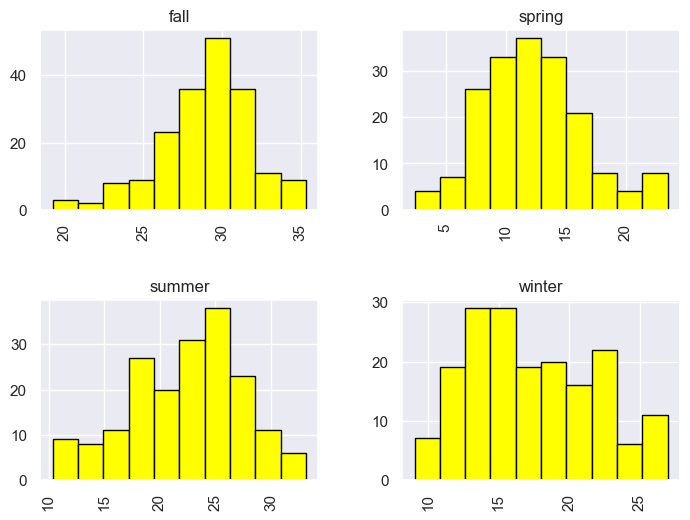

In [19]:
#Histogram temperature
rent_data_modified['temperature'].hist(by=rent_data_modified['season'], edgecolor='black', color='yellow', figsize = (8,6))

array([[<Axes: title={'center': 'fall'}>,
        <Axes: title={'center': 'spring'}>],
       [<Axes: title={'center': 'summer'}>,
        <Axes: title={'center': 'winter'}>]], dtype=object)

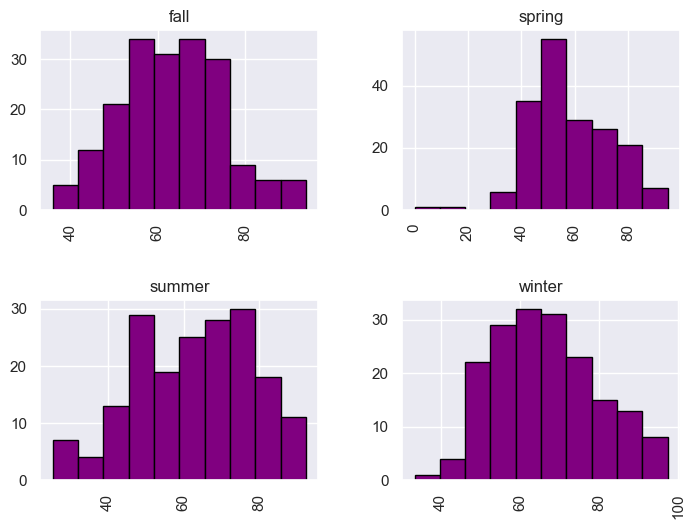

In [20]:
#Histogram humidity
rent_data_modified['humidity'].hist(by=rent_data_modified['season'], edgecolor='black', color='purple', figsize = (8,6))

array([[<Axes: title={'center': 'fall'}>,
        <Axes: title={'center': 'spring'}>],
       [<Axes: title={'center': 'summer'}>,
        <Axes: title={'center': 'winter'}>]], dtype=object)

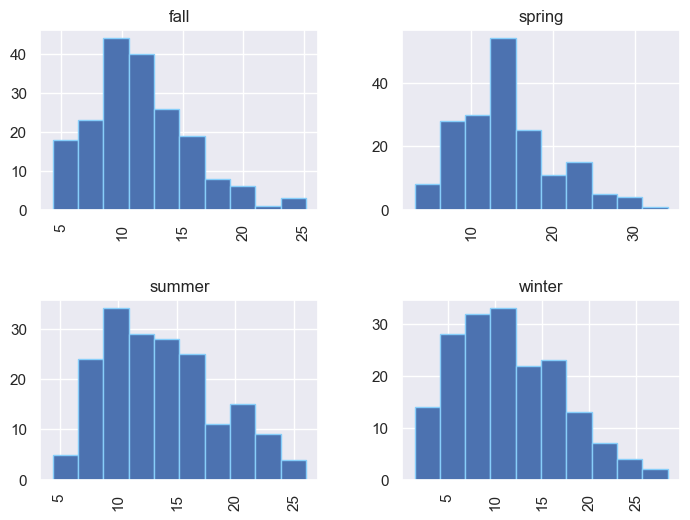

In [21]:
#Histogram windspeed
rent_data_modified['windspeed'].hist(by=rent_data_modified['season'], edgecolor='lightskyblue', figsize = (8,6))

#### 4. Berapa nilai rata-rata suhu (temperature), kelembaban (humidity) kecepatan angin (windspeed) dan jumlah sepeda yang disewa (count) berdasarkan bulan?

In [22]:
#Menghitung rata-rata temperature, humidity, windspeed dan total sepeda yang disewa per bulan
mean_month = rent_data_modified.groupby(by=["mnth","month"]).agg({
    "temperature": "mean",
    "humidity": "mean",
    "windspeed": "mean",
    "count": "mean"
}).reset_index()

print(mean_month)

    mnth month  temperature   humidity  windspeed        count
0      1   Jan     9.694201  58.582827  13.822285  2176.338710
1      2   Feb    12.268284  56.746468  14.450824  2655.298246
2      3   Mar    16.012089  58.847503  14.920863  3692.258065
3      4   Apr    19.269952  58.806312  15.710310  4484.900000
4      5   May    24.386735  68.895831  12.260258  5349.774194
5      6  June    28.047985  57.580552  12.423134  5772.366667
6      7  July    30.974287  59.787632  11.125941  5563.677419
7      8   Aug    29.051844  63.773010  11.585516  5664.419355
8      9   Sep    25.275884  71.471437  11.118323  5766.516667
9     10   Oct    19.885500  69.376087  11.738767  5199.225806
10    11   Nov    15.138010  62.487648  12.314695  4247.183333
11    12   Dec    13.285270  66.604052  11.832798  3403.806452


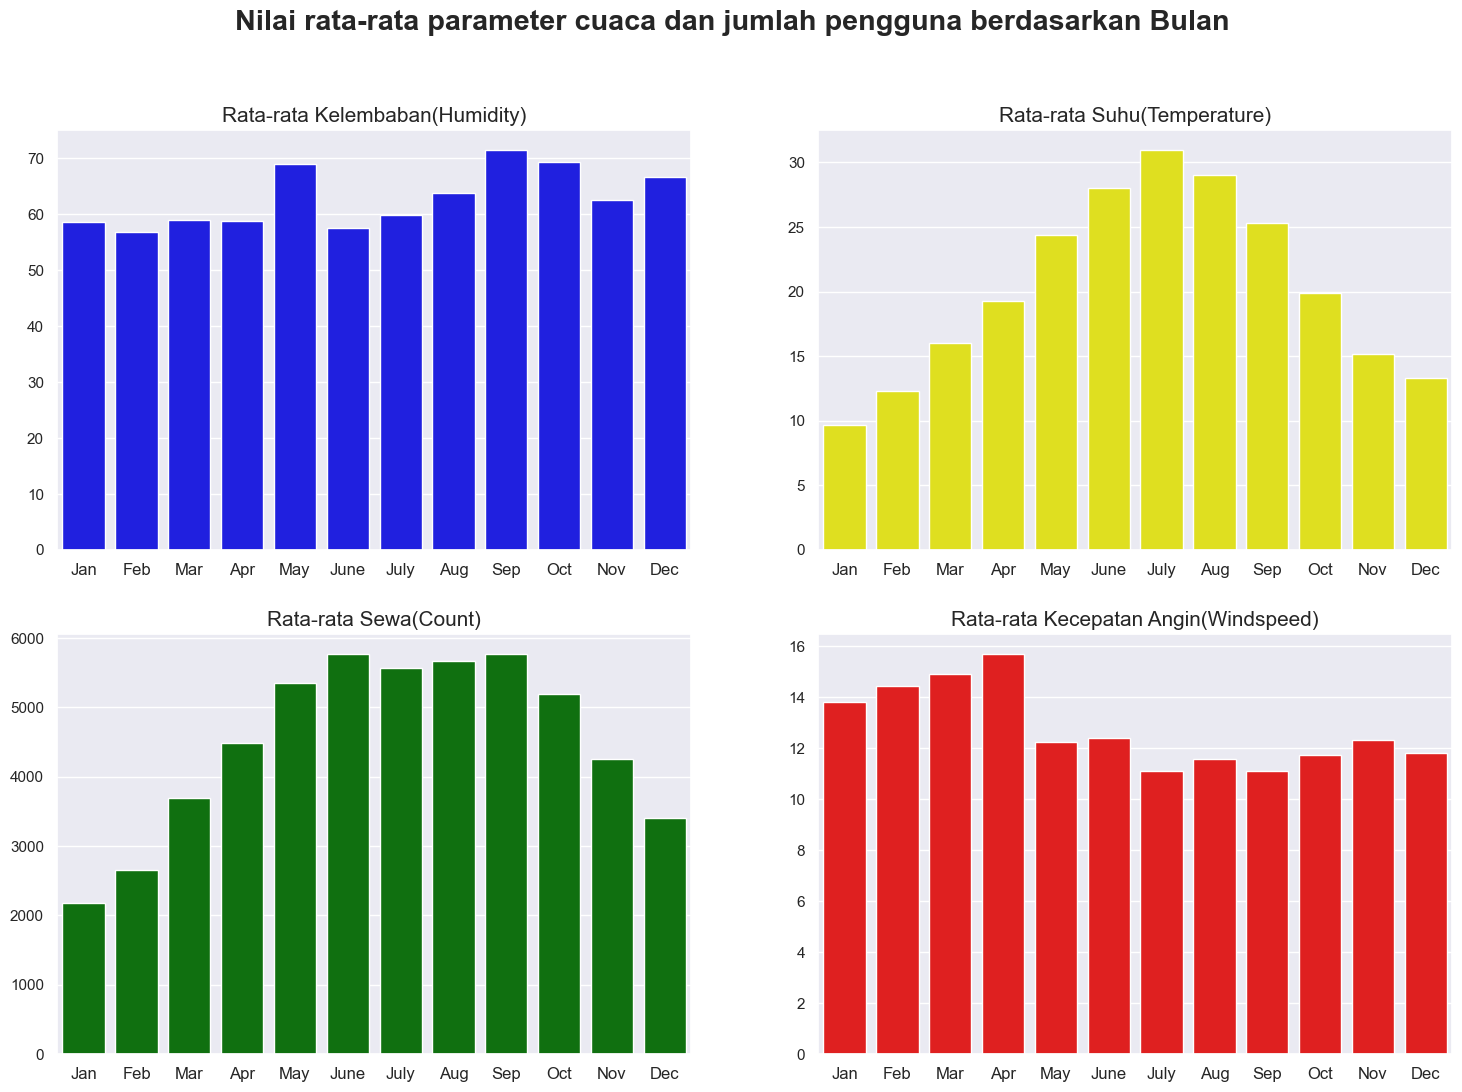

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

sns.barplot(y="humidity", x="month", data=mean_month.sort_values(by="mnth", ascending=True), color="blue", ax=ax[0, 0])
ax[0, 0].set_ylabel(None)
ax[0, 0].set_xlabel(None)
ax[0, 0].set_title("Rata-rata Kelembaban(Humidity)", loc="center", fontsize=15)
ax[0, 0].tick_params(axis = 'x', labelsize=12)

sns.barplot(y="temperature", x="month", data=mean_month.sort_values(by="mnth", ascending=True), color="yellow", ax=ax[0, 1])
ax[0, 1].set_ylabel(None)
ax[0, 1].set_xlabel(None)
ax[0, 1].set_title('Rata-rata Suhu(Temperature)', loc="center", fontsize=15)
ax[0, 1].tick_params(axis = 'x', labelsize=12)

sns.barplot(y="count", x="month", data=mean_month.sort_values(by="mnth", ascending=True), color="green", ax=ax[1, 0])
ax[1, 0].set_ylabel(None)
ax[1, 0].set_xlabel(None)
ax[1, 0].set_title('Rata-rata Sewa(Count)', loc="center", fontsize=15)
ax[1, 0].tick_params(axis = 'x', labelsize=12)

sns.barplot(y="windspeed", x="month", data=mean_month.sort_values(by="mnth", ascending=True), color="red", ax=ax[1, 1])
ax[1, 1].set_ylabel(None)
ax[1, 1].set_xlabel(None)
ax[1, 1].set_title('Rata-rata Kecepatan Angin(Windspeed)', loc="center", fontsize=15)
ax[1, 1].tick_params(axis = 'x', labelsize=12)

fig.suptitle('Nilai rata-rata parameter cuaca dan jumlah pengguna berdasarkan Bulan', fontsize = 'xx-large', weight = 'bold')
plt.show()

#### 5. Apakah suhu (temperature), kelembaban (humidity) dan kecepatan angin (windspeed) berkaitan erat dengan pengguna (user casual dan user registered)?

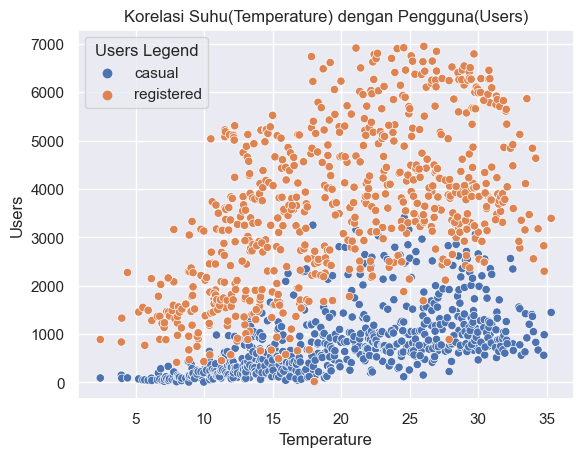

In [24]:
#Scatter plot user_type(casual vs registered) berdasarkan temperature
temp_user = rent_data_modified.groupby(by="temperature").agg({
    "casual": ["min", "max"], 
    "registered": ["min", "max"]
}).reset_index()

temp_user_melted = temp_user.melt(id_vars="temperature", var_name="user_type", value_name="value")

scatter_temp_user = sns.scatterplot(x="temperature",y="value", hue="user_type", data=temp_user_melted, marker="o")

scatter_temp_user.legend(title="Users Legend")
plt.title("Korelasi Suhu(Temperature) dengan Pengguna(Users)")
plt.xlabel("Temperature")
plt.ylabel("Users")
plt.show()

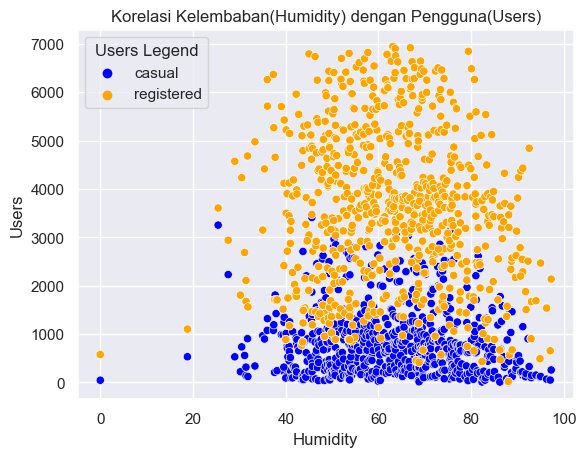

In [25]:
#Scatter plot user_type(casual vs registered) berdasarkan humidity
hum_user = rent_data_modified.groupby(by="humidity").agg({
    "casual": ["min", "max"], 
    "registered": ["min", "max"]
}).reset_index()

hum_user_melted = hum_user.melt(id_vars="humidity", var_name="user_type", value_name="value")
colors = {'casual':'blue', 'registered':'orange'}
scatter_hum_user = sns.scatterplot(x="humidity",y="value", hue="user_type", palette = colors, data=hum_user_melted, marker="o")

scatter_hum_user.legend(title="Users Legend")
plt.title("Korelasi Kelembaban(Humidity) dengan Pengguna(Users)")
plt.xlabel("Humidity")
plt.ylabel("Users")
plt.show()

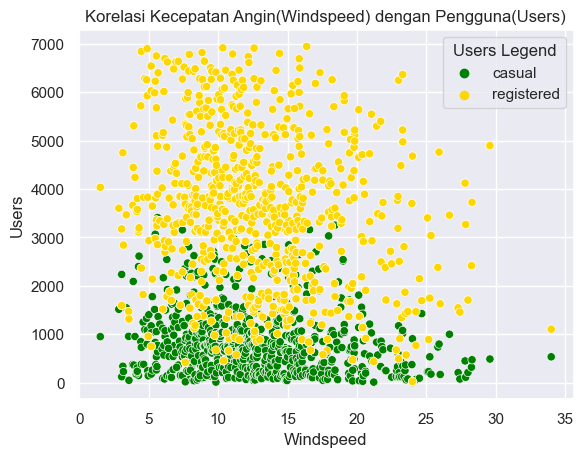

In [26]:
#Scatter plot user_type(casual vs registered) berdasarkan windspeed
wind_user = rent_data_modified.groupby(by="windspeed").agg({
    "casual": ["min", "max"], 
    "registered": ["min", "max"]
}).reset_index()

wind_user_melted = wind_user.melt(id_vars="windspeed", var_name="user_type", value_name="value")
colors = {'casual':'green', 'registered':'gold'}
scatter_wind_user = sns.scatterplot(x="windspeed",y="value", hue="user_type", palette = colors, data=wind_user_melted, marker="o")

scatter_wind_user.legend(title="Users Legend")
plt.title("Korelasi Kecepatan Angin(Windspeed) dengan Pengguna(Users)")
plt.xlabel("Windspeed")
plt.ylabel("Users")
plt.show()

#### 6. Apakah kondisi cuaca berpengaruh dengan jumlah sepeda yang disewa?

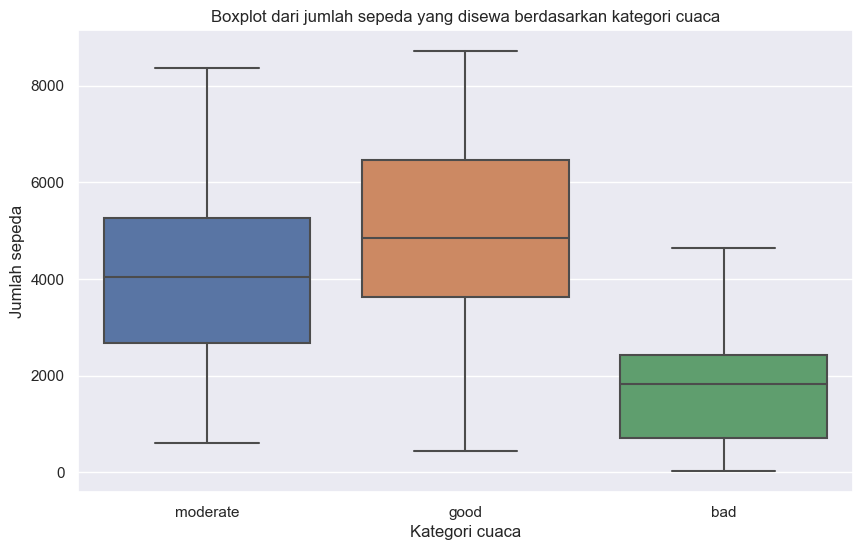

In [27]:
# Plotting boxplot using seaborn and matplotlib
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(data=rent_data_modified, x="weather", y="count")

# Adding labels and title
plt.xlabel("Kategori cuaca")
plt.ylabel("Jumlah sepeda")
plt.title("Boxplot dari jumlah sepeda yang disewa berdasarkan kategori cuaca")

plt.show()

#### 7. Bagaimana statistik jumlah sepeda yang disewa berdasarkan tahun (2011 dan 2012) dan bulan?

In [28]:
# Konversi Tahun
# - yr : year (0: 2011, 1:2012)

year_mapping = {0: "2011", 1: "2012"}
rent_data_modified['year_mapped'] = rent_data_modified['yr'].replace(year_mapping)

# Grouping and aggregating data
monthly_count_modified = rent_data_modified.groupby(by=["year_mapped", "mnth", "month"]).agg({
    "count": "sum"
}).reset_index()

print(monthly_count_modified)

   year_mapped  mnth month   count
0         2011     1   Jan   38189
1         2011     2   Feb   48215
2         2011     3   Mar   64045
3         2011     4   Apr   94870
4         2011     5   May  135821
5         2011     6  June  143512
6         2011     7  July  141341
7         2011     8   Aug  136691
8         2011     9   Sep  127418
9         2011    10   Oct  123511
10        2011    11   Nov  102167
11        2011    12   Dec   87323
12        2012     1   Jan   96744
13        2012     2   Feb  103137
14        2012     3   Mar  164875
15        2012     4   Apr  174224
16        2012     5   May  195865
17        2012     6  June  202830
18        2012     7  July  203607
19        2012     8   Aug  214503
20        2012     9   Sep  218573
21        2012    10   Oct  198841
22        2012    11   Nov  152664
23        2012    12   Dec  123713


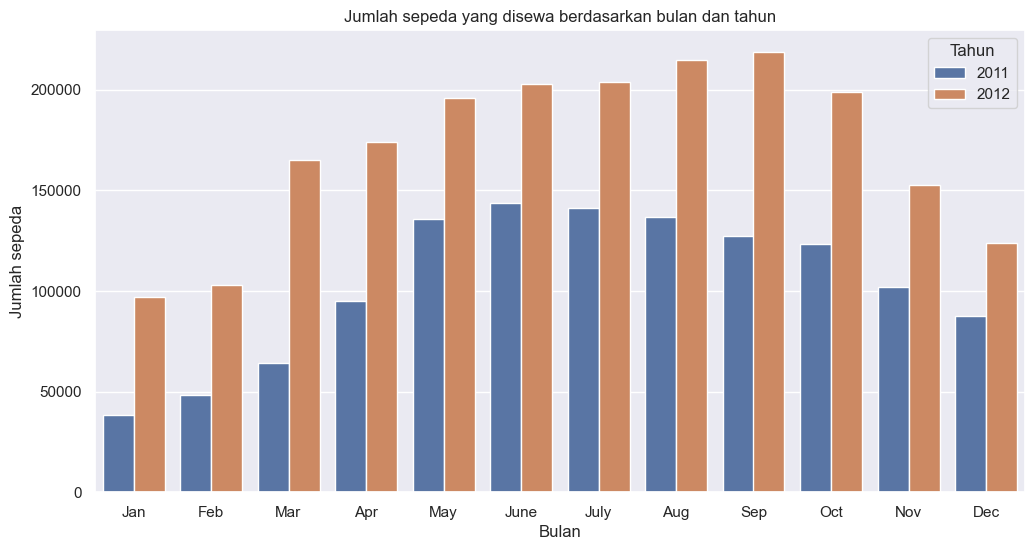

In [29]:
# Plotting unstacked bar chart using seaborn and matplotlib
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=monthly_count_modified, x="month", y="count", hue="year_mapped", dodge=True)

# Adding legend and labels
bar_plot.legend(title="Tahun")
plt.xlabel("Bulan")
plt.ylabel("Jumlah sepeda")
plt.title("Jumlah sepeda yang disewa berdasarkan bulan dan tahun")

plt.show()

#### 8. Bagaimana trend penyewaan sepeda berdasarkan hari dalam 1 pekan?

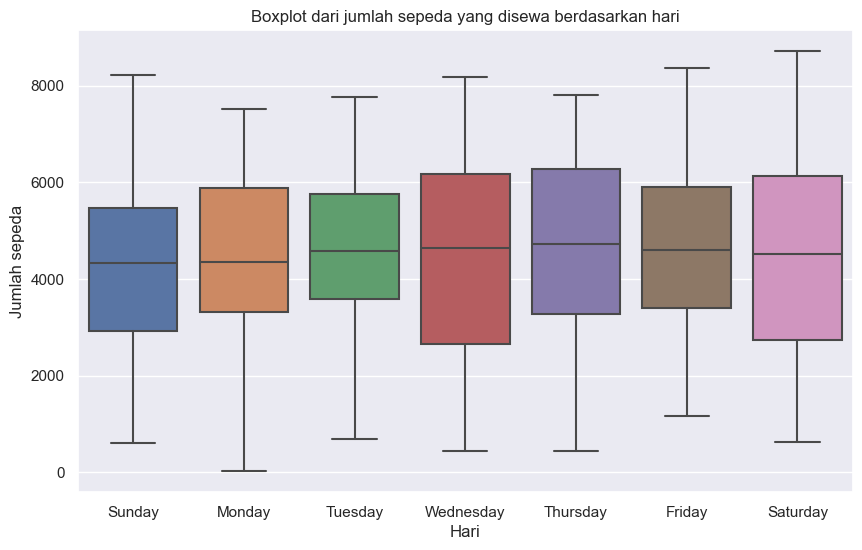

In [30]:
# Plotting boxplot using seaborn and matplotlib
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(data=rent_data_modified, x="weekday", y="count")

# Adding labels and title
plt.xlabel("Hari")
plt.ylabel("Jumlah sepeda")
plt.title("Boxplot dari jumlah sepeda yang disewa berdasarkan hari")

weekday_labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
box_plot.set_xticklabels(weekday_labels)

plt.show()

In [31]:
#Jumlah sepeda yang disewa pada saat bukan hari libur dan bukan hari kerja
#Sum holiday=0, workingday=0, yr_mapped=2011
filtered_y0h0w0 = rent_data_modified.loc[(rent_data_modified['year_mapped']=="2011") & (rent_data_modified['holiday']==0)
                                  & (rent_data_modified['workingday']==0)]

total_cnt_y0h0w0 = filtered_y0h0w0['count'].sum()

print(f'Jumlah sepeda yang disewa pada saat bukan hari libur dan bukan hari kerja di tahun 2011: {total_cnt_y0h0w0}')

Jumlah sepeda yang disewa pada saat bukan hari libur dan bukan hari kerja di tahun 2011: 356817


In [32]:
#Jumlah sepeda yang disewa pada saat hari libur dan bukan hari kerja
#Sum holiday=1, workingday=0, yr_mapped=2011
filtered_y0h1w0 = rent_data_modified.loc[(rent_data_modified['year_mapped']=="2011") & (rent_data_modified['holiday']==1) 
                                  & (rent_data_modified['workingday']==0)]

total_cnt_y0h1w0 = filtered_y0h1w0['count'].sum()

print(f'Jumlah sepeda yang disewa pada saat hari libur dan bukan hari kerja di tahun 2011 : {total_cnt_y0h1w0}')

Jumlah sepeda yang disewa pada saat hari libur dan bukan hari kerja di tahun 2011 : 30022


In [33]:
#Jumlah sepeda yang disewa pada saat bukan hari libur dan hari kerja
#Sum holiday=0, workingday=1, yr_mapped=2011
filtered_y0h0w1 = rent_data_modified.loc[(rent_data_modified['year_mapped']=="2011") & (rent_data_modified['holiday']==0) 
                                  & (rent_data_modified['workingday']==1)]

total_cnt_y0h0w1 = filtered_y0h0w1['count'].sum()

print(f'Jumlah sepeda yang disewa pada saat bukan hari libur dan hari kerja di tahun 2011: {total_cnt_y0h0w1}')

Jumlah sepeda yang disewa pada saat bukan hari libur dan hari kerja di tahun 2011: 856264


In [34]:
#Jumlah sepeda yang disewa pada saat hari libur dan hari kerja
#Sum holiday=1, workingday=1, yr_mapped=2011
filtered_y0h1w1 = rent_data_modified.loc[(rent_data_modified['year_mapped']=="2011") & (rent_data_modified['holiday']==1) 
                                  & (rent_data_modified['workingday']==1)]

total_cnt_y0h1w1 = filtered_y0h1w1['count'].sum()

print(f'Jumlah sepeda yang disewa pada saat hari libur dan hari kerja di tahun 2011: {total_cnt_y0h1w1}')

Jumlah sepeda yang disewa pada saat hari libur dan hari kerja di tahun 2011: 0


#### 9. Bagaimana trend penyewaan sepeda berdasarkan hari kerja dan hari libur di tahun 2011?

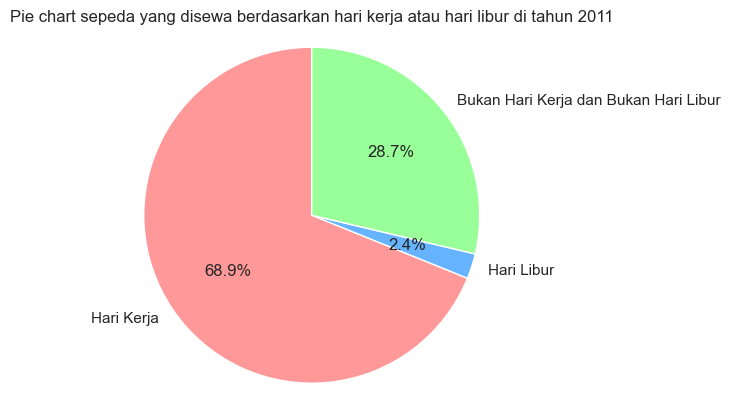

In [35]:
# Pie chart
#labels = ['holiday=0 & workingday=1', 'holiday=1 & workingday=0', 'holiday=0 & workingday=0']
labels = ['Hari Kerja', 'Hari Libur', 'Bukan Hari Kerja dan Bukan Hari Libur']
sizes = [total_cnt_y0h0w1, total_cnt_y0h1w0, total_cnt_y0h0w0]
colors = ['#ff9999', '#66b3ff', '#99ff99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Pie chart sepeda yang disewa berdasarkan hari kerja atau hari libur di tahun 2011")
plt.show()

In [36]:
# List jumlah sepeda yang disewa pada saat bukan hari libur dan bukan hari kerja di tahun 2011
display(rent_data_modified.loc[(rent_data_modified['year_mapped']=="2011") & (rent_data_modified['holiday']==0) & (rent_data_modified['workingday']==0)])

,no,date,season_code,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,count,temperature,humidity,windspeed,season,month,weather,year_mapped
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,331,654,985,14.110847,80.5833,10.749882,spring,Jan,moderate,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,131,670,801,14.902598,69.6087,16.652113,spring,Jan,moderate,2011
3,8,2011-01-08,1,0,1,0,6,0,2,0.165000,...,68,891,959,6.765000,53.5833,17.875868,spring,Jan,moderate,2011
5,15,2011-01-15,1,0,1,0,6,0,2,0.233333,...,222,1026,1248,9.566653,49.8750,10.583521,spring,Jan,moderate,2011
27,36,2011-02-05,1,0,2,0,6,0,2,0.233333,...,100,905,1005,9.566653,92.9167,10.792293,spring,Feb,moderate,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,323,2011-11-19,4,0,11,0,6,0,1,0.329167,...,943,2720,3663,13.495847,50.2083,15.041232,winter,Nov,good,2011
684,330,2011-11-26,4,0,11,0,6,0,1,0.375833,...,1249,1819,3068,15.409153,68.1667,4.584194,winter,Nov,good,2011
685,331,2011-11-27,4,0,11,0,0,0,1,0.459167,...,810,2261,3071,18.825847,69.8333,13.999918,winter,Nov,good,2011
717,106,2011-04-16,2,0,4,0,6,0,3,0.430833,...,121,674,795,17.664153,88.8333,22.834136,summer,Apr,bad,2011


In [37]:
#Jumlah sepeda yang disewa pada saat bukan hari libur dan bukan hari kerja
#Sum holiday=0, workingday=0, yr_mapped=2012
filtered_y1h0w0 = rent_data_modified.loc[(rent_data_modified['year_mapped']=="2012") & (rent_data_modified['holiday']==0)
                                  & (rent_data_modified['workingday']==0)]

total_cnt_y1h0w0 = filtered_y1h0w0['count'].sum()

print(f'Jumlah sepeda yang disewa pada saat bukan hari libur dan bukan hari kerja di tahun 2012: {total_cnt_y1h0w0}')

Jumlah sepeda yang disewa pada saat bukan hari libur dan bukan hari kerja di tahun 2012: 565017


In [38]:
#Jumlah sepeda yang disewa pada saat hari libur dan bukan hari kerja
#Sum holiday=1, workingday=0, yr_mapped=2012
filtered_y1h1w0 = rent_data_modified.loc[(rent_data_modified['year_mapped']=="2012") & (rent_data_modified['holiday']==1) 
                                  & (rent_data_modified['workingday']==0)]

total_cnt_y1h1w0 = filtered_y1h1w0['count'].sum()

print(f'Jumlah sepeda yang disewa pada saat hari libur dan bukan hari kerja di tahun 2012: {total_cnt_y1h1w0}')

Jumlah sepeda yang disewa pada saat hari libur dan bukan hari kerja di tahun 2012: 48413


In [39]:
#Jumlah sepeda yang disewa pada saat bukan hari libur dan hari kerja
#Sum holiday=0, workingday=1, yr_mapped=2012
filtered_y1h0w1 = rent_data_modified.loc[(rent_data_modified['year_mapped']=="2012") & (rent_data_modified['holiday']==0) 
                                  & (rent_data_modified['workingday']==1)]

total_cnt_y1h0w1 = filtered_y1h0w1['count'].sum()

print(f'Jumlah sepeda yang disewa pada saat bukan hari libur dan hari kerja di tahun 2012: {total_cnt_y1h0w1}')

Jumlah sepeda yang disewa pada saat bukan hari libur dan hari kerja di tahun 2012: 1436146


In [40]:
#Jumlah sepeda yang disewa pada saat hari libur dan hari kerja
#Sum holiday=1, workingday=1, yr_mapped=2012
filtered_y1h1w1 = rent_data_modified.loc[(rent_data_modified['year_mapped']=="2012") & (rent_data_modified['holiday']==1) 
                                  & (rent_data_modified['workingday']==1)]

total_cnt_y1h1w1 = filtered_y1h1w1['count'].sum()

print(f'Jumlah sepeda yang disewa pada saat hari libur dan hari kerja di tahun 2012: {total_cnt_y1h1w1}')

Jumlah sepeda yang disewa pada saat hari libur dan hari kerja di tahun 2012: 0


#### 10. Bagaimana trend penyewaan sepeda berdasarkan hari kerja dan hari libur di tahun 2012?

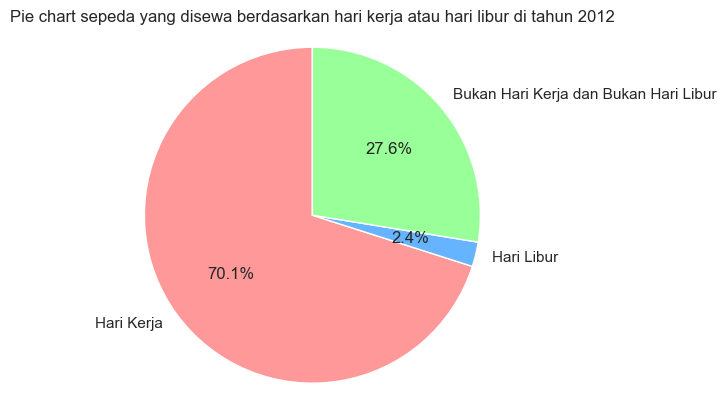

In [41]:
# Pie chart
#labels = ['holiday=0 & workingday=1', 'holiday=1 & workingday=0', 'holiday=0 & workingday=0']
labels = ['Hari Kerja', 'Hari Libur', 'Bukan Hari Kerja dan Bukan Hari Libur']
sizes = [total_cnt_y1h0w1, total_cnt_y1h1w0, total_cnt_y1h0w0]
colors = ['#ff9999', '#66b3ff', '#99ff99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Pie chart sepeda yang disewa berdasarkan hari kerja atau hari libur di tahun 2012")
plt.show()

## Conclusion

1. Kesimpulan untuk pertanyaan no. 1  
Berapa nilai maksimum, minimum, mean, median dan standar deviasi untuk suhu (temperature), kelembaban (humidity), kecepatan angin (windspeed) dan jumlah sepeda yang disewa (count) berdasarkan musim?  
Kesimpulan : Berdasarkan statistik ini, bisa dilihat nilai rata-rata jumlah sepeda yang disewa per hari berdasarkan musim. Nilai rata-rata tertinggi jumlah sepeda yang disewa pada musim Fall (dengan nilai rata-rata temperature : 28,9 , humidity : 63,5 dan windspeed : 11,5). Sedangkan nilai rata-rata terendah jumlah sepeda yang disewa pada musim Spring (dengan nilai rata-rata temperature : 12,2 , humidity : 58,3 dan windspeed : 14,4)

2. Kesimpulan untuk pertanyaan no. 2  
Berapa nilai maksimum, minimum, mean, median dan standar deviasi untuk suhu (temperature), kelembaban (humidity), kecepatan angin (windspeed) dan jumlah sepeda yang disewa (count) berdasarkan bulan?  
Kesimpulan : Berdasarkan statistik ini, bisa dilihat nilai rata-rata jumlah sepeda yang disewa per hari berdasarkan bulan. Nilai rata-rata tertinggi jumlah sepeda yang disewa pada bulan Juni (dengan nilai rata-rata temperature : 28 humidity : 57,6 dan windspeed : 12,4). Sedangkan nilai rata-rata terendah jumlah sepeda yang disewa pada bulan Januari (dengan nilai rata-rata temperature : 9,7 , humidity : 58,6 dan windspeed : 13,8)

3. Kesimpulan untuk pertanyaan no. 3  
Bagaimana perubahan suhu (temperature), kelembaban (humidity) dan kecepatan angin (windspeed) di sepanjang musim?   
Kesimpulan : Pada musim summer, suhu udara yang hangat, kecepatan angin yang sedang, dan kelembaban yang rendah membuat bersepeda menjadi lebih nyaman dan menyenangkan. Hal ini karena suhu udara yang hangat akan membuat tubuh menjadi lebih rileks, kecepatan angin yang sedang tidak akan membuat sepeda menjadi terlalu sulit dikendarai, dan kelembaban yang rendah akan membuat tubuh tidak merasa lembab.  
Pada musim spring dan fall, suhu udara yang tidak terlalu panas atau dingin, kecepatan angin yang sedang, dan kelembaban yang sedang juga merupakan kondisi yang baik untuk bersepeda.  
Pada musim winter, suhu udara yang dingin, kecepatan angin yang kencang, dan kelembaban yang tinggi dapat membuat bersepeda menjadi tidak nyaman dan berbahaya. Hal ini karena suhu udara yang dingin dapat membuat tubuh menjadi kaku dan rentan mengalami hipotermia, kecepatan angin yang kencang dapat membuat sepeda menjadi sulit dikendarai dan meningkatkan risiko kecelakaan, dan kelembaban yang tinggi dapat membuat tubuh merasa lembab.  
Berdasarkan hal tersebut, musim summer adalah musim yang paling direkomendasikan untuk bersepeda dengan parameter suhu, kecepatan angin, dan kelembaban. Musim spring dan fall juga merupakan musim yang cukup baik untuk bersepeda, tetapi dengan catatan bahwa kecepatan angin tidak terlalu kencang dan kelembaban tidak terlalu tinggi. Musim winter adalah musim yang paling tidak direkomendasikan untuk bersepeda, kecuali jika cuaca sangat cerah, kecepatan angin tidak terlalu kencang, dan kelembaban tidak terlalu tinggi.

4. Kesimpulan untuk pertanyaan no. 4   
Berapa nilai rata-rata suhu (temperature), kelembaban (humidity), kecepatan angin (windspeed) dan jumlah sepeda yang disewa (count) dalam satu bulan?  
Kesimpulan : Berdasarkan grafik tersebut maka dapat disimpulkan di bulan Juni - Agustus adalah kondisi ideal untuk menyewa sepeda. Jumlah total penyewaan sepeda meningkat seiring dengan meningkatnya suhu. Untuk kelembaban (humidity) dan kecepatan angin (windspeed) tidak mempengaruhi intensitas penyewaan sepeda.

5. Kesimpulan untuk pertanyaan no. 5  
Apakah suhu (temperature), kelembaban (humidity) dan kecepatan angin (windspeed) berkaitan erat dengan pengguna (user casual dan user registered)?  
Kesimpulan : Seperti yang dapat kita lihat pada plot, terdapat hubungan antara pengguna (user casual dan user registered) dengan suhu (temperature). Jumlah pengguna (user casual dan user registered) sangat bergantung terhadap suhu. Ketika nilai suhu naik, maka jumlah penyewaan sepeda juga meningkat. Selain itu, kita juga dapat melihat bahwa pengguna (user registerd) menyewa lebih banyak sepeda daripada pengguna (user casual). Untuk kelembaban (humidity) dan kecepatan angin (windspeed) tidak mempengaruhi intensitas penyewaan sepeda.

6. Kesimpulan untuk pertanyaan no. 6  
Apakah kondisi cuaca berpengaruh dengan jumlah sepeda yang disewa?  
Kesimpulan : Jumlah sepeda yang disewa pada cuaca yang baik (good) lebih tinggi. Cuaca yang baik (good) merupakan kondisi yang baik untuk penyewaan sepeda secara umum. Pada cuaca baik (good), orang-orang cenderung merasa lebih nyaman dan aman untuk bersepeda. Situasi cuaca yang sangat buruk (worse), baik pengguna (user registered) maupun pengguna (user casual) tidak ada yang menyewa sepeda.

7. Kesimpulan untuk pertanyaan no. 7  
Bagaimana statistik jumlah sepeda yang disewa berdasarkan tahun (2011 dan 2012) dan bulan?  
Kesimpulan : Berdasarkan grafik tersebut, dapat ditarik beberapa kesimpulan
yaitu  
Jumlah sepeda yang disewa meningkat secara signifikan dari tahun 2011 ke tahun 2012. Hal ini menunjukkan bahwa semakin banyak orang yang menggunakan sepeda sebagai alat transportasi atau rekreasi.  
Peningkatan jumlah sepeda yang disewa paling signifikan terjadi pada bulan-bulan musim panas (Juni-Agustus). Hal ini menunjukkan bahwa orang-orang lebih cenderung bersepeda pada cuaca yang hangat dan cerah.


8. Kesimpulan untuk pertanyaan no. 8  
Bagaimana trend penyewaan sepeda berdasarkan hari dalam 1 pekan?  
Kesimpulan : Jumlah sepeda yang disewa pada hari Sabtu (Saturday) dan Minggu (Sunday) lebih tinggi daripada hari-hari lainnya. Hal ini terlihat dari posisi median dan batas atas boxplot pada hari Sabtu (Saturday) dan Minggu (Sunday) yang berada di atas batas atas boxplot pada hari-hari lainnya. Karena pada hari Sabtu (Saturday) dan Minggu (Sunday), orang-orang cenderung memiliki lebih banyak waktu luang sehingga lebih banyak acara atau kegiatan yang dapat dilakukan dengan sepeda. Cuaca cenderung lebih cerah sangat mendukung kegiatan bersepeda.


9. Kesimpulan untuk pertanyaan no. 9  
Bagaimana trend penyewaan sepeda berdasarkan hari kerja dan hari libur di tahun 2011?  
Kesimpulan : Hari kerja adalah hari dengan jumlah penyewaan sepeda terbanyak, yaitu 68,9%.  
Hari libur adalah hari dengan jumlah penyewaan sepeda paling sedikit, yaitu 2,4%.  
Hari sabtu dan minggu adalah hari dengan jumlah penyewaan sepeda yang cukup tinggi, yaitu 28,7%.  
Hari kerja adalah hari ketika orang-orang cenderung bekerja atau sekolah. Hal ini menyebabkan mereka memiliki lebih sedikit waktu luang untuk bersepeda.

10. Kesimpulan untuk pertanyaan no. 10  
Bagaimana trend penyewaan sepeda berdasarkan hari kerja dan hari libur di tahun 2012?  
Kesimpulan : Hari kerja adalah hari dengan jumlah penyewaan sepeda terbanyak, yaitu 70,1%.  
Hari libur adalah hari dengan jumlah penyewaan sepeda paling sedikit, yaitu 2,4%.  
Hari sabtu dan minggu adalah hari dengan jumlah penyewaan sepeda yang cukup tinggi, yaitu 27,6%.  
Terjadi peningkatan secara signifikan di hari kerja dari tahun 2011 ke tahun 2012.